# Feature selection

# 🧠 Feature Selection: Complete Notes

## ✅ What is Feature Selection?

**Feature Selection** is the process of selecting the most relevant features (columns) from your dataset that contribute the most to predicting the target variable.

It helps to:
- Improve model **performance**
- Reduce **overfitting**
- Speed up **training**
- Make models **easier to interpret**

---

## 🎯 Why Do We Need Feature Selection?

- Remove **irrelevant or redundant** features
- Avoid **curse of dimensionality** (especially in high-dimensional datasets)
- Reduce **training time and complexity**
- Improve **model generalization** to unseen data

---

## 🧩 Types of Feature Selection Methods

---

### 1. **Filter Methods**

These methods use **statistical techniques** to select features **independent of the model**.

#### 📌 Examples:

| Technique | When to Use | Description |
|-----------|-------------|-------------|
| **Correlation** | Numeric features | Remove features with high correlation (`> 0.8`) |
| **Chi-Squared Test** | Categorical → Categorical Target | Measures dependency |
| **ANOVA F-test** | Numeric → Categorical Target | Compares variance |
| **Mutual Information** | Any type | Measures info shared with target |

```python
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)




* Their are many number of columns some of which are unimportant and less values
* And some has to be merged with each other to use
* To selecting thise perticular column is called feature selection

* According you domain knowldge we need to select visely (Need to have domain knowledge)
* Very important to have domain knwoledge

**Forward Elimination** *Technique*

* So when we have many number of feature, for M1 model we will load all the feature one by one at first and calculated the score
* And we will select that feature which has highest score and combine that which rest all feature (loading in pairs of two)
* Again calculate the accuracy score and select those which has more that previous accuracy score. If combining accuracy is less than first than we will select the first only.
* Again make pairs of 3 ......

This is called forward elimination because feature are getting eliminated while moving forward
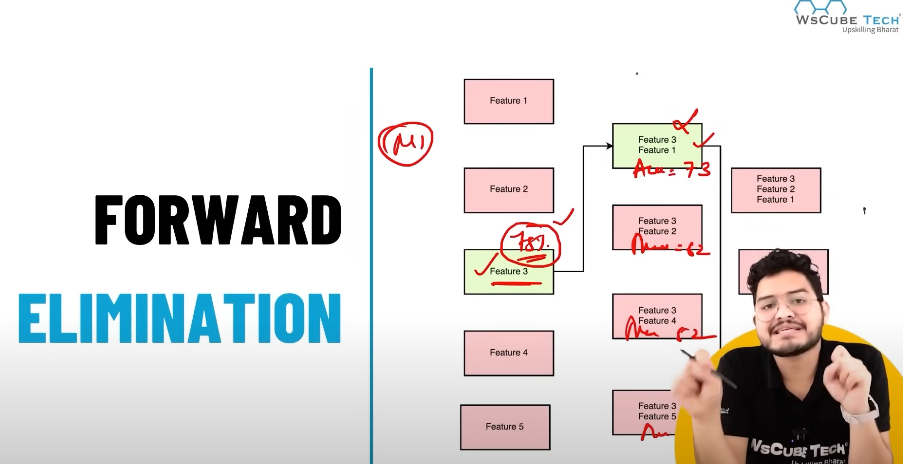

**Backward Elimination** *Technique*

* Reversed as forward elimination
* Combine all the feature and note the accuracy
* At next step drop any one and measure the accuracy
* .... keep one drop one by one until you reach the max accuracy score
* 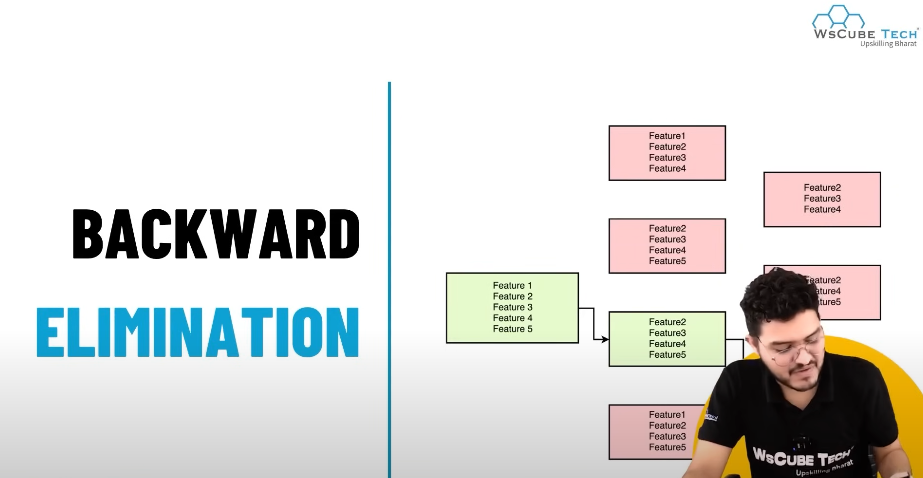

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('D:\Data Science\Datasets\diabetes.csv')
data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_3260\2860330129.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Data Science\Datasets\diabetes.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector

Sapareting out x (input) and y (Label) data

In [8]:
x = data.iloc[:,:-1] #that is 
y = data['Outcome']

In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Now we need to have a model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [21]:
fs = SequentialFeatureSelector(lr,k_features=5, forward=True) 
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [22]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [24]:
fs.k_feature_names_

('Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age')

In [25]:
fs.k_score_

0.7708768355827178

* Keep on changing k_features and check for the k_score_ then select the feature accordingly
* You can also check with backward elimination